# Week 2 Assignment: Correlation and regression #
#### This assignment is mainly to use linear regression to predict the logarithm of the number of shares from the other variables ####

For this assignment I will use data from *Mashable (www.mashable.com)*. Mashable is an online magazine that focuses on producing viral content

In [460]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [461]:
df = pd.read_csv('Assignment 2 - data Mashable.csv') #read csv file
print(df.head())

   id                                                url  n_tokens_title  \
0   1  http://mashable.com/2013/10/29/ashton-kutcher-...              10   
1   2  http://mashable.com/2014/09/08/mashies-sept-19...               9   
2   3  http://mashable.com/2013/02/01/hello-kitty-roc...              11   
3   4  http://mashable.com/2014/02/06/add-us-on-snapc...               8   
4   5  http://mashable.com/2014/01/07/lindsey-vonn-wi...               9   

   n_tokens_content  num_imgs  num_videos  average_token_length  \
0               821        12           0              4.518879   
1               489         6           0              5.040900   
2               131         0           1              4.877863   
3               556         2           0              4.974820   
4               880        18           0              4.928409   

   data_channel_is_lifestyle  data_channel_is_entertainment  \
0                          0                              0   
1             

After an in-depth interpretation of the fields, I decided to select those following 5 variables, which are 'Number of words in the content','Number of images','Was the article published on the weekend?' and 'Is data channel"entertainment"/"lifestyle"/"world"/"tech"? 'to explore if there's any correlation between them.

The reason why I choose these variables is for example, “is the length of the article content related to the number of pictures?”； “The content about whether the entertainment/lifestyle/world/tech is more subjective (ie the author’s personal opinions, emotions or judgments are stronger)” etc.

*Note: 'data_channel_is_entertainment','data_channel_is_lifestyle','data_channel_is_world' and 'data_channel_is_tech' here i count as 1 variable*

In [462]:
df_subset = df[['n_tokens_content','num_imgs','is_weekend','global_subjectivity','data_channel_is_entertainment','data_channel_is_lifestyle','data_channel_is_world','data_channel_is_tech']]
 #select five variables

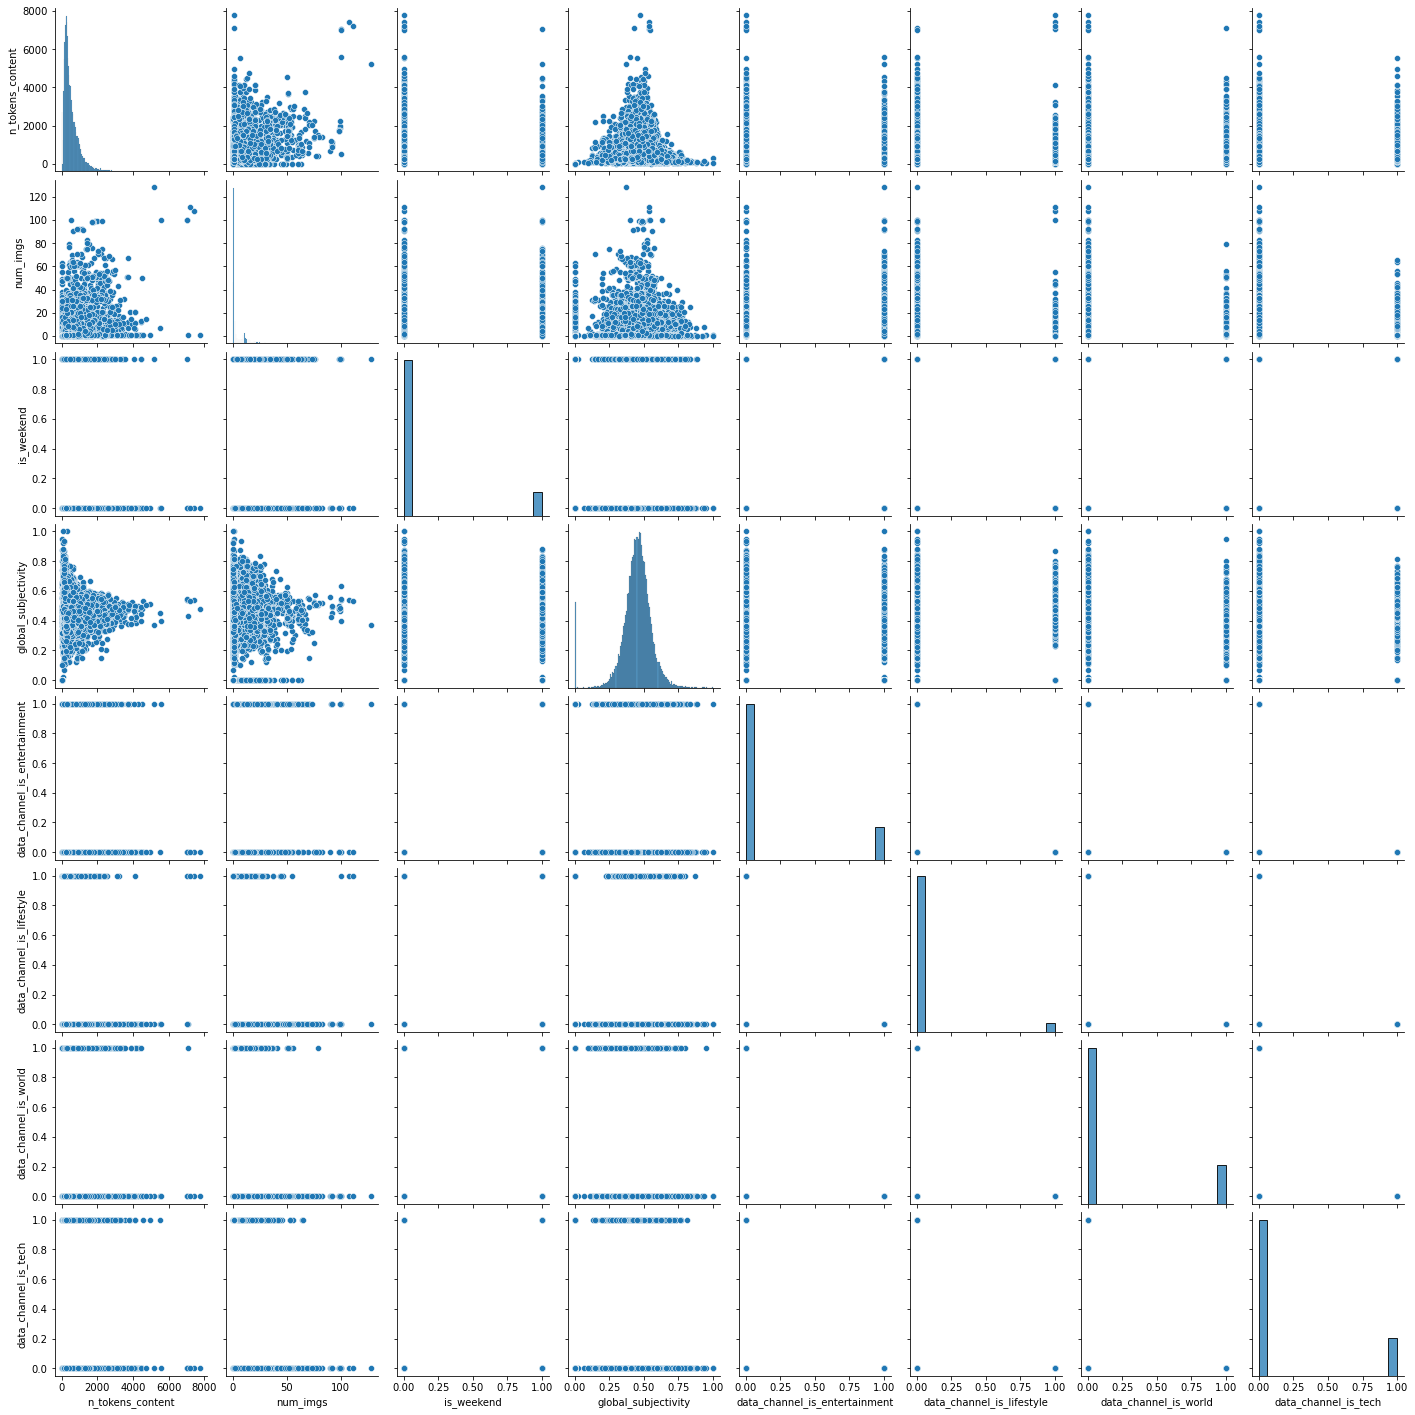

In [463]:
sns.pairplot(df_subset) #use scatterplot matrix to see if there's any abnormal datas 
plt.show()

From scatter plots, it can be seen that there's few abnormal datas in column 'global_subjectivity'. Therefore, i am going to do data cleaning first before the analyze.

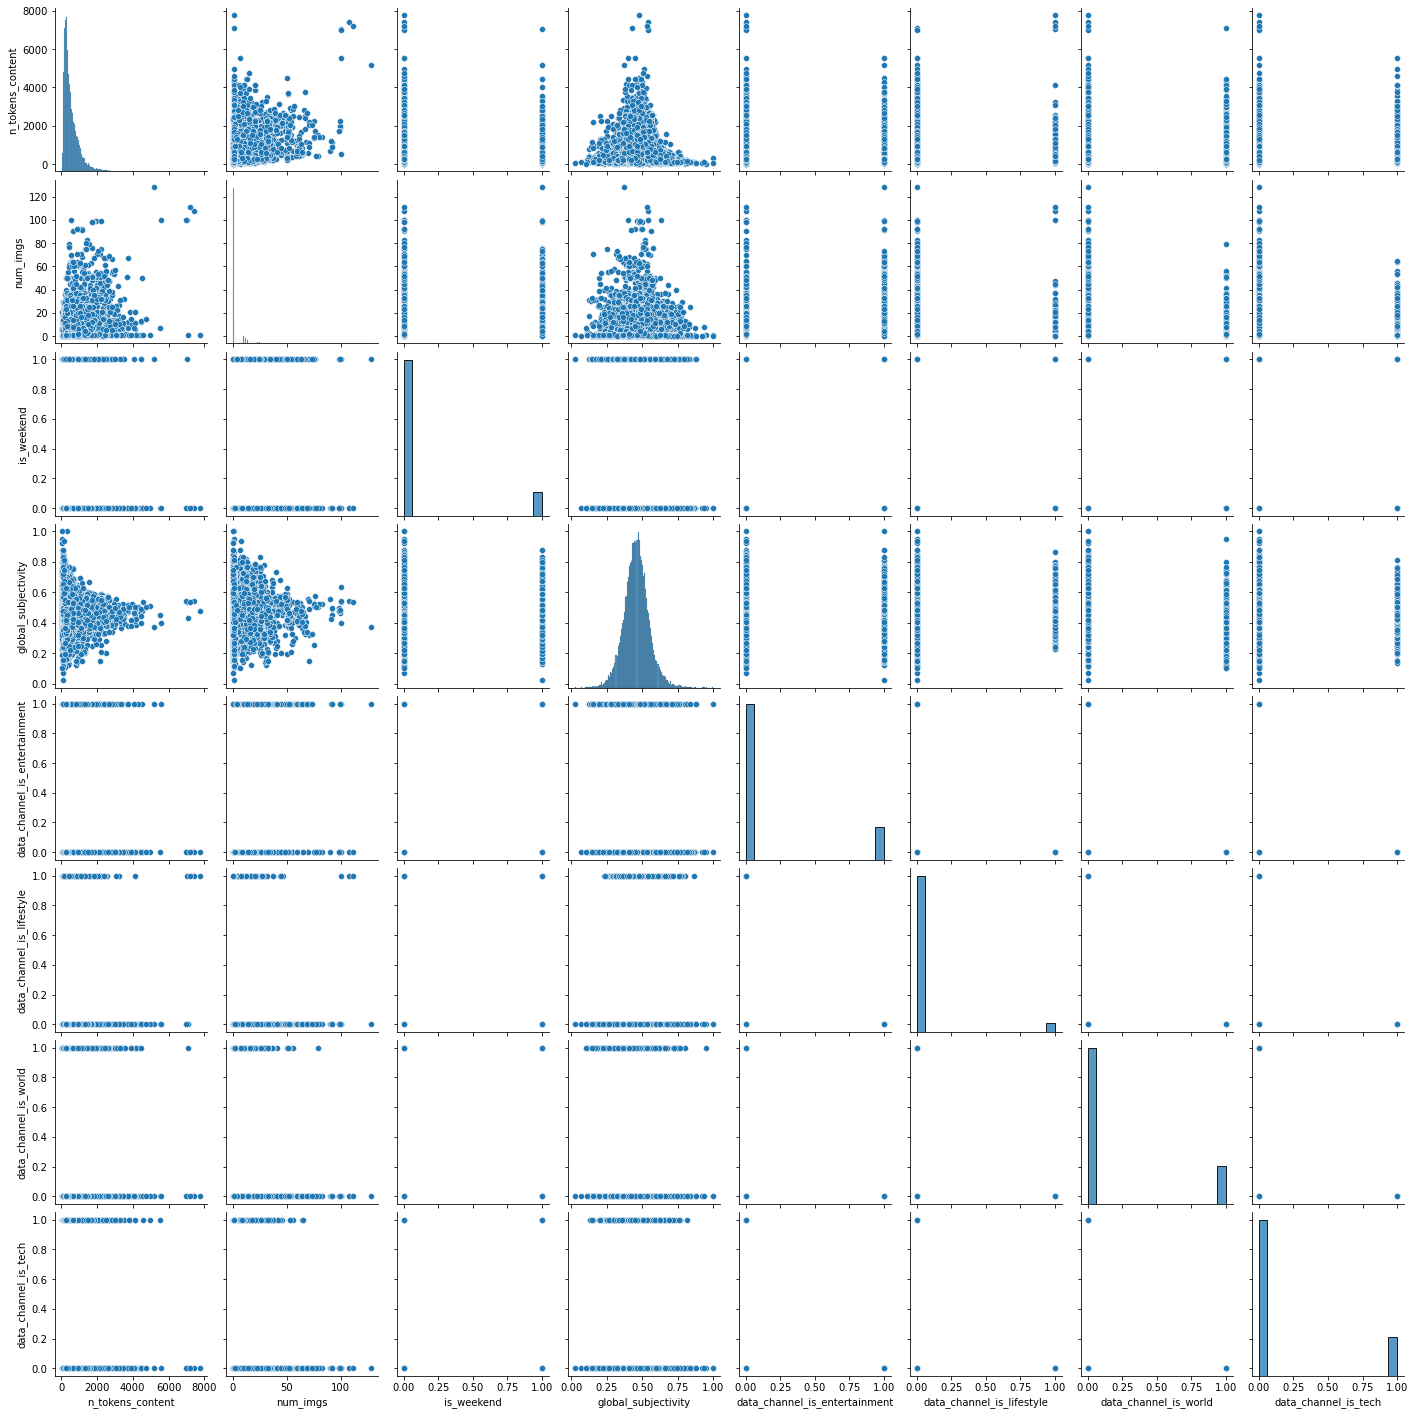

In [464]:
df_subset = df_subset[df_subset['global_subjectivity'] > 0] #set global_subjectivity above 0
sns.pairplot(df_subset) #show the plots again 
plt.show()

From the scatterplots I can see that:
1. There might have correlations between 'n_tokens_content' and 'num_imgs'
2. It seems that 'is_weekend' does not have any correlations with other four variables, same as 'data_channel_is_entertainment','data_channel_is_lifestyle','data_channel_is_world' and 'data_channel_is_tech'

However, it's just my guess, so i will use corr() method and heatmap method to verify my hypothesis

In [465]:
corr = df_subset.corr() 
print(corr)

                               n_tokens_content  num_imgs  is_weekend  \
n_tokens_content                       1.000000  0.368255    0.048481   
num_imgs                               0.368255  1.000000    0.051306   
is_weekend                             0.048481  0.051306    1.000000   
global_subjectivity                   -0.013131  0.093013    0.030339   
data_channel_is_entertainment          0.058830  0.110307   -0.005846   
data_channel_is_lifestyle              0.029556  0.000077    0.042230   
data_channel_is_world                  0.056090 -0.117085   -0.009590   
data_channel_is_tech                   0.009450 -0.007904   -0.001665   

                               global_subjectivity  \
n_tokens_content                         -0.013131   
num_imgs                                  0.093013   
is_weekend                                0.030339   
global_subjectivity                       1.000000   
data_channel_is_entertainment             0.041299   
data_channel_is_li

It shows that there is no strong correlation between these 5 variables, some of them even have negative results, for example like 'data_channel_is_world' and 'data_channel_is_tech', if the contents are about World or Tech, they doesn’t usually seem to be published on weekends. Moreover, both of them their texts are not highly subjective. But the number of words in content and the number of images seems have a bit correlation.

However, I am going to use heatmap to reinforce my conclusion.

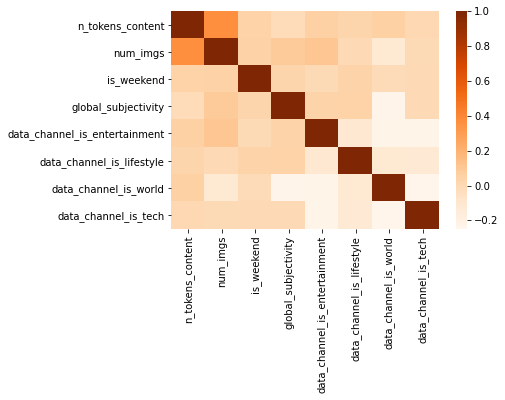

In [466]:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels= corr.columns, cmap='Oranges')
plt.show()

It is more obvious from the heatmap that there is no strong correlation between these 5 variables, only ‘n_tokens_content‘and’num_imgs’ may have some relationship.

Therefore, I will zoom in on the relation between "Number of words in the content" and "Number of images". 
I will first plot the relation. I will set "the Number of words in the content" as x-asis, because in online magazines, pictures are more like "attachments" to the content. In other words, "the number of words in content" is our independent variable, and "the number of pictures" is our dependent variable.

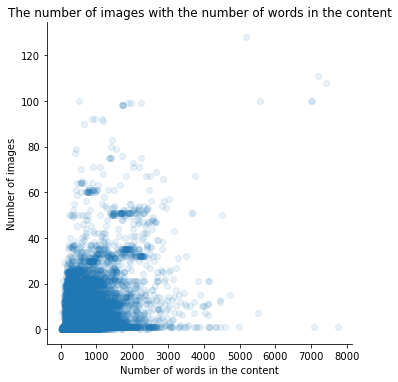

In [467]:
sns.lmplot(x= 'n_tokens_content', y= 'num_imgs',fit_reg=False, data=df_subset, scatter_kws={'alpha':0.1})
plt.xlabel('Number of words in the content') #use matplotlib to refine Seaborn plot
plt.ylabel('Number of images')
plt.title('The number of images with the number of words in the content')
plt.show()

The relation between them seems quite equal, cannot tell so much from this scatter, but it proves that not all magazines have an increase in the number of images as the amount of content increases

In [468]:
from scipy.stats.stats import pearsonr
print(pearsonr(df_subset['n_tokens_content'],df_subset['num_imgs']))

(0.3682545502751752, 0.0)


The result gives me two numbers: r = 0.37, and p = 0.0

number of words in the content and number of images are moderate correlated (0.3 < r = 0.37 < 0.6)
The correlation is highly significant (p < 0.001)

Then I will create linear model for both train set and test set

                                                 url  n_tokens_content  \
0  http://mashable.com/2013/10/29/ashton-kutcher-...               821   
1  http://mashable.com/2014/09/08/mashies-sept-19...               489   
2  http://mashable.com/2013/02/01/hello-kitty-roc...               131   
3  http://mashable.com/2014/02/06/add-us-on-snapc...               556   
4  http://mashable.com/2014/01/07/lindsey-vonn-wi...               880   

   num_imgs  is_weekend  global_subjectivity  data_channel_is_entertainment  \
0        12           0             0.439379                              0   
1         6           0             0.300454                              0   
2         0           0             0.575486                              0   
3         2           0             0.327220                              0   
4        18           0             0.507709                              0   

   data_channel_is_lifestyle  data_channel_is_world  data_channel_is_tech  \
0  

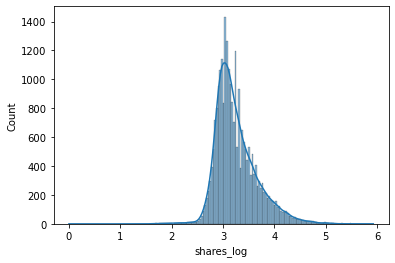

In [469]:
df_subset = df[['url','n_tokens_content','num_imgs','is_weekend','global_subjectivity','data_channel_is_entertainment','data_channel_is_lifestyle','data_channel_is_world','data_channel_is_tech','shares_log']] #I am adding "url" and "shares_log" column because we are going to predict the log of shares
df_subset = df_subset.dropna() #drop nah data
print(df_subset.head())
sns.histplot(df_subset['shares_log'],kde=True) #just to see if the data looks normal
plt.show()

For sk-learn to work, I first need to create separate X and Y that include the variables that we want to use.

In [470]:
y = df_subset['shares_log'] #take shares_log as Y-variable
X = df_subset.loc[:,'n_tokens_content':'data_channel_is_tech'] #include all rows and the columns from "n_tokens_content" to "data_channel_is_tech"
X.index = df_subset['url'] #set index as article url
X.head()

,n_tokens_content,num_imgs,is_weekend,global_subjectivity,data_channel_is_entertainment,data_channel_is_lifestyle,data_channel_is_world,data_channel_is_tech
url,,,,,,,,
http://mashable.com/2013/10/29/ashton-kutcher-lenovo/,821,12,0,0.439379,0,0,0,1
http://mashable.com/2014/09/08/mashies-sept-19-deadline/,489,6,0,0.300454,0,0,1,0
http://mashable.com/2013/02/01/hello-kitty-rocket/,131,0,0,0.575486,0,0,0,0
http://mashable.com/2014/02/06/add-us-on-snapchat/,556,2,0,0.327220,0,0,0,0
http://mashable.com/2014/01/07/lindsey-vonn-withdraws-sochi-olympics-knee-injury/,880,18,0,0.507709,0,0,0,1


Now I have X and y, and can start training the model. First, let's split the data into a training set and a test set.

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,n_tokens_content,num_imgs,is_weekend,global_subjectivity,data_channel_is_entertainment,data_channel_is_lifestyle,data_channel_is_world,data_channel_is_tech
url,,,,,,,,
http://mashable.com/2013/02/03/puppy-bowl-online/,141,0,1,0.451711,0,0,0,0
http://mashable.com/2014/09/11/bridesmaid-lost-dress-sydney/,392,9,0,0.476976,0,0,0,0
http://mashable.com/2013/03/08/facebook-acquires-storylane/,622,1,0,0.488495,0,0,0,0
http://mashable.com/2014/04/29/yahoo-mail-app-redesign/,251,23,0,0.545746,0,0,0,0
http://mashable.com/2013/08/28/chef-knife-moves-video/,940,13,0,0.507042,0,0,0,0


I will now train the linear model

In [472]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

Then I will have a look at the coefficients

In [473]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
0.000004,n_tokens_content
0.003499,num_imgs
0.125695,is_weekend
0.201719,global_subjectivity
-0.144089,data_channel_is_entertainment
-0.007137,data_channel_is_lifestyle
-0.167705,data_channel_is_world
-0.027088,data_channel_is_tech


We can interpret these coefficients as follows:

1. More words in the content would increase 0.000004 the logarithm of the number of shares
2. More number of the images would increase 0.004 the logarithm of the number of shares
3. If articles are published on weekend, the logarithm of the number of shares will increase 0.126
4. If the texts are subjectivity, the logarithm of the number of shares will increase 0.202
5. If the articles are about Entertainment, the logarithm of the number of shares would decrease 0.144
6. If the articles are about Lifestyle, the logarithm of the number of shares would decrease 0.007
5. If the articles are about World, the logarithm of the number of shares would decrease 0.168
5. If the articles are about Tech, the logarithm of the number of shares would decrease 0.027

I will now generate predictions and calculate the R^2 and RMSE by using test data.

In [474]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.050564569087212186

The R^2 is 0.51, which means 51% of the variation in movie scores is explained by the model.

In [475]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.39563302016864615

The RMSE is 0.40. Which means that we are typically about 0.40 off in our predicted the log number of shares 

Now it's time to plot the predicted the log number of shares against the actual shares_log.

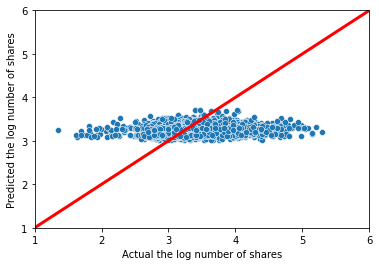

In [476]:
sns.scatterplot(x=y_test, y=y_test_p)
plt.xlabel('Actual the log number of shares')
plt.ylabel('Predicted the log number of shares')
plt.xlim([1,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([1,6])
plt.plot([1, 6], [1, 6], color='red', lw=3) #Plot a diagonal length
plt.show()

From the plot it can be seen that because of the lower R Square, the Predictive model seems pretty weak, most points are far away from the diagonal.

I think this model seems to have three subsections of performance: 
- The first one is where Actuals have values between 1 and 3, within this zone, my model steadily slightly overestimated. 
- The second one is when Actuals are between 3 and 4, within this zone, the model does not seem too bad. 
- The last one is where Actuals have values between 4 and 6, within this zone, my model steadily slightly underestimates the Actual values.


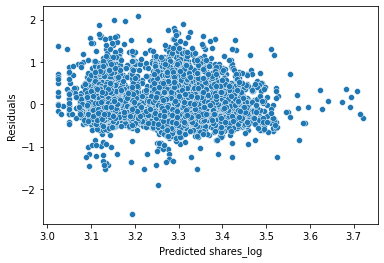

In [477]:
residuals = y_test - y_test_p
sns.scatterplot(x=y_test_p,y=residuals)
plt.xlabel('Predicted shares_log')
plt.ylabel('Residuals')
plt.show()